## Import the relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
# Read the CSV into a dataframe

header_names = ['sample_code_number', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']
data_df = pd.read_csv('breast-cancer-wisconsin - Copy.csv', header = None, names = header_names)

# Looking back at lecture, it is also possible to use regular expression to determine which entries are integers. Give this a try later.
indices_with_unexpected_values_in_bare_nuclei = ~data_df.bare_nuclei.isin(['1','2','3','4','5','6','7','8','9','10'])

rows_with_unexpected_values_in_bare_nuclei = data_df[~data_df.bare_nuclei.isin(['1','2','3','4','5','6','7','8','9','10'])]

print(rows_with_unexpected_values_in_bare_nuclei[['bare_nuclei', 'class']])
missing_by_tumor_class = rows_with_unexpected_values_in_bare_nuclei[['bare_nuclei', 'class']].groupby('class').count()
population_by_tumor_class = data_df['class'].value_counts()

percentage_missing_in_benign = 100*missing_by_tumor_class.loc[2,'bare_nuclei']/population_by_tumor_class[2]
percentage_missing_in_malignant = 100*missing_by_tumor_class.loc[4,'bare_nuclei']/population_by_tumor_class[4]

print("Percentage of missing bare_nuclei in benign tumors: {0:2.2f}%".format( percentage_missing_in_benign))
print("Percentage of missing bare_nuclei in malignant tumors: {0:2.2f}%".format( percentage_missing_in_malignant))
# Class: (2 for benign, 4 for malignant)

data_df = data_df[~indices_with_unexpected_values_in_bare_nuclei]

data_df.bare_nuclei = data_df.bare_nuclei.astype('int64')

    bare_nuclei  class
23            ?      4
40            ?      2
139           ?      2
145           ?      2
158           ?      2
164           ?      2
235           ?      2
249           ?      2
275           ?      2
292           ?      4
294           ?      2
297           ?      2
315           ?      2
321           ?      2
411           ?      2
617           ?      2
Percentage of missing bare_nuclei in benign tumors: 3.06%
Percentage of missing bare_nuclei in malignant tumors: 0.83%


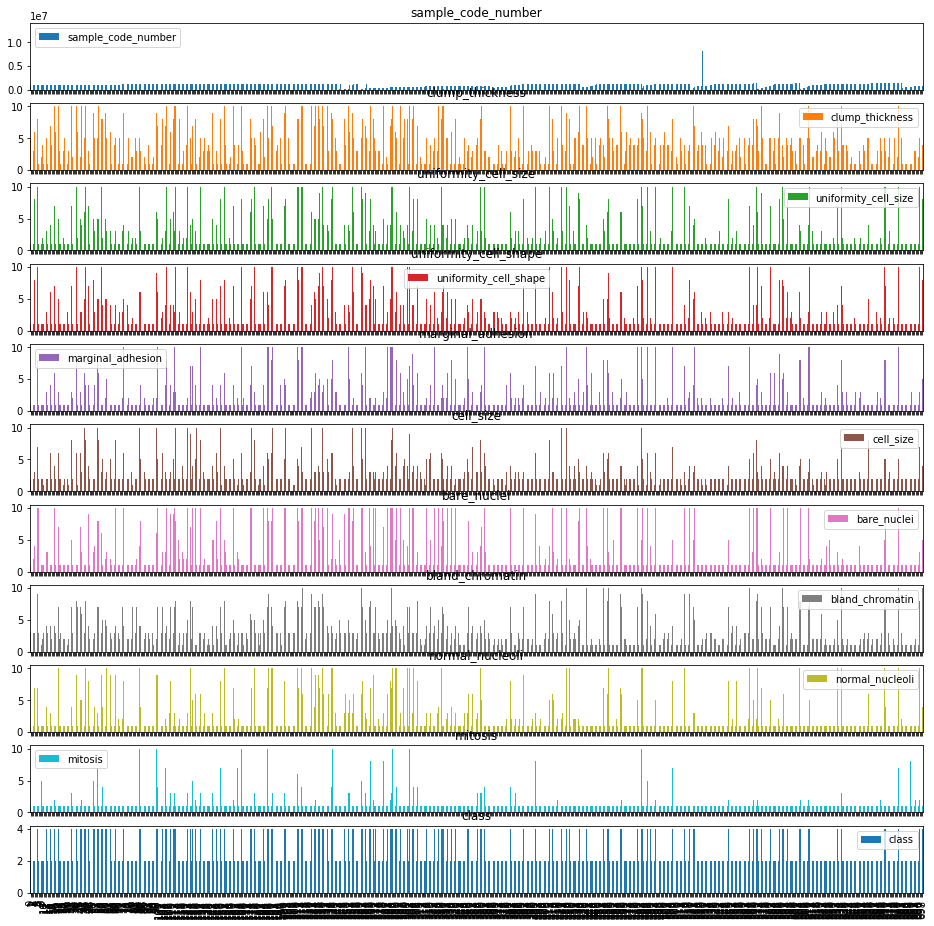

In [3]:

data_df.plot(subplots=True,figsize = (16,16), kind = 'bar')
plt.savefig('data_plot.jpg')
plt.show()


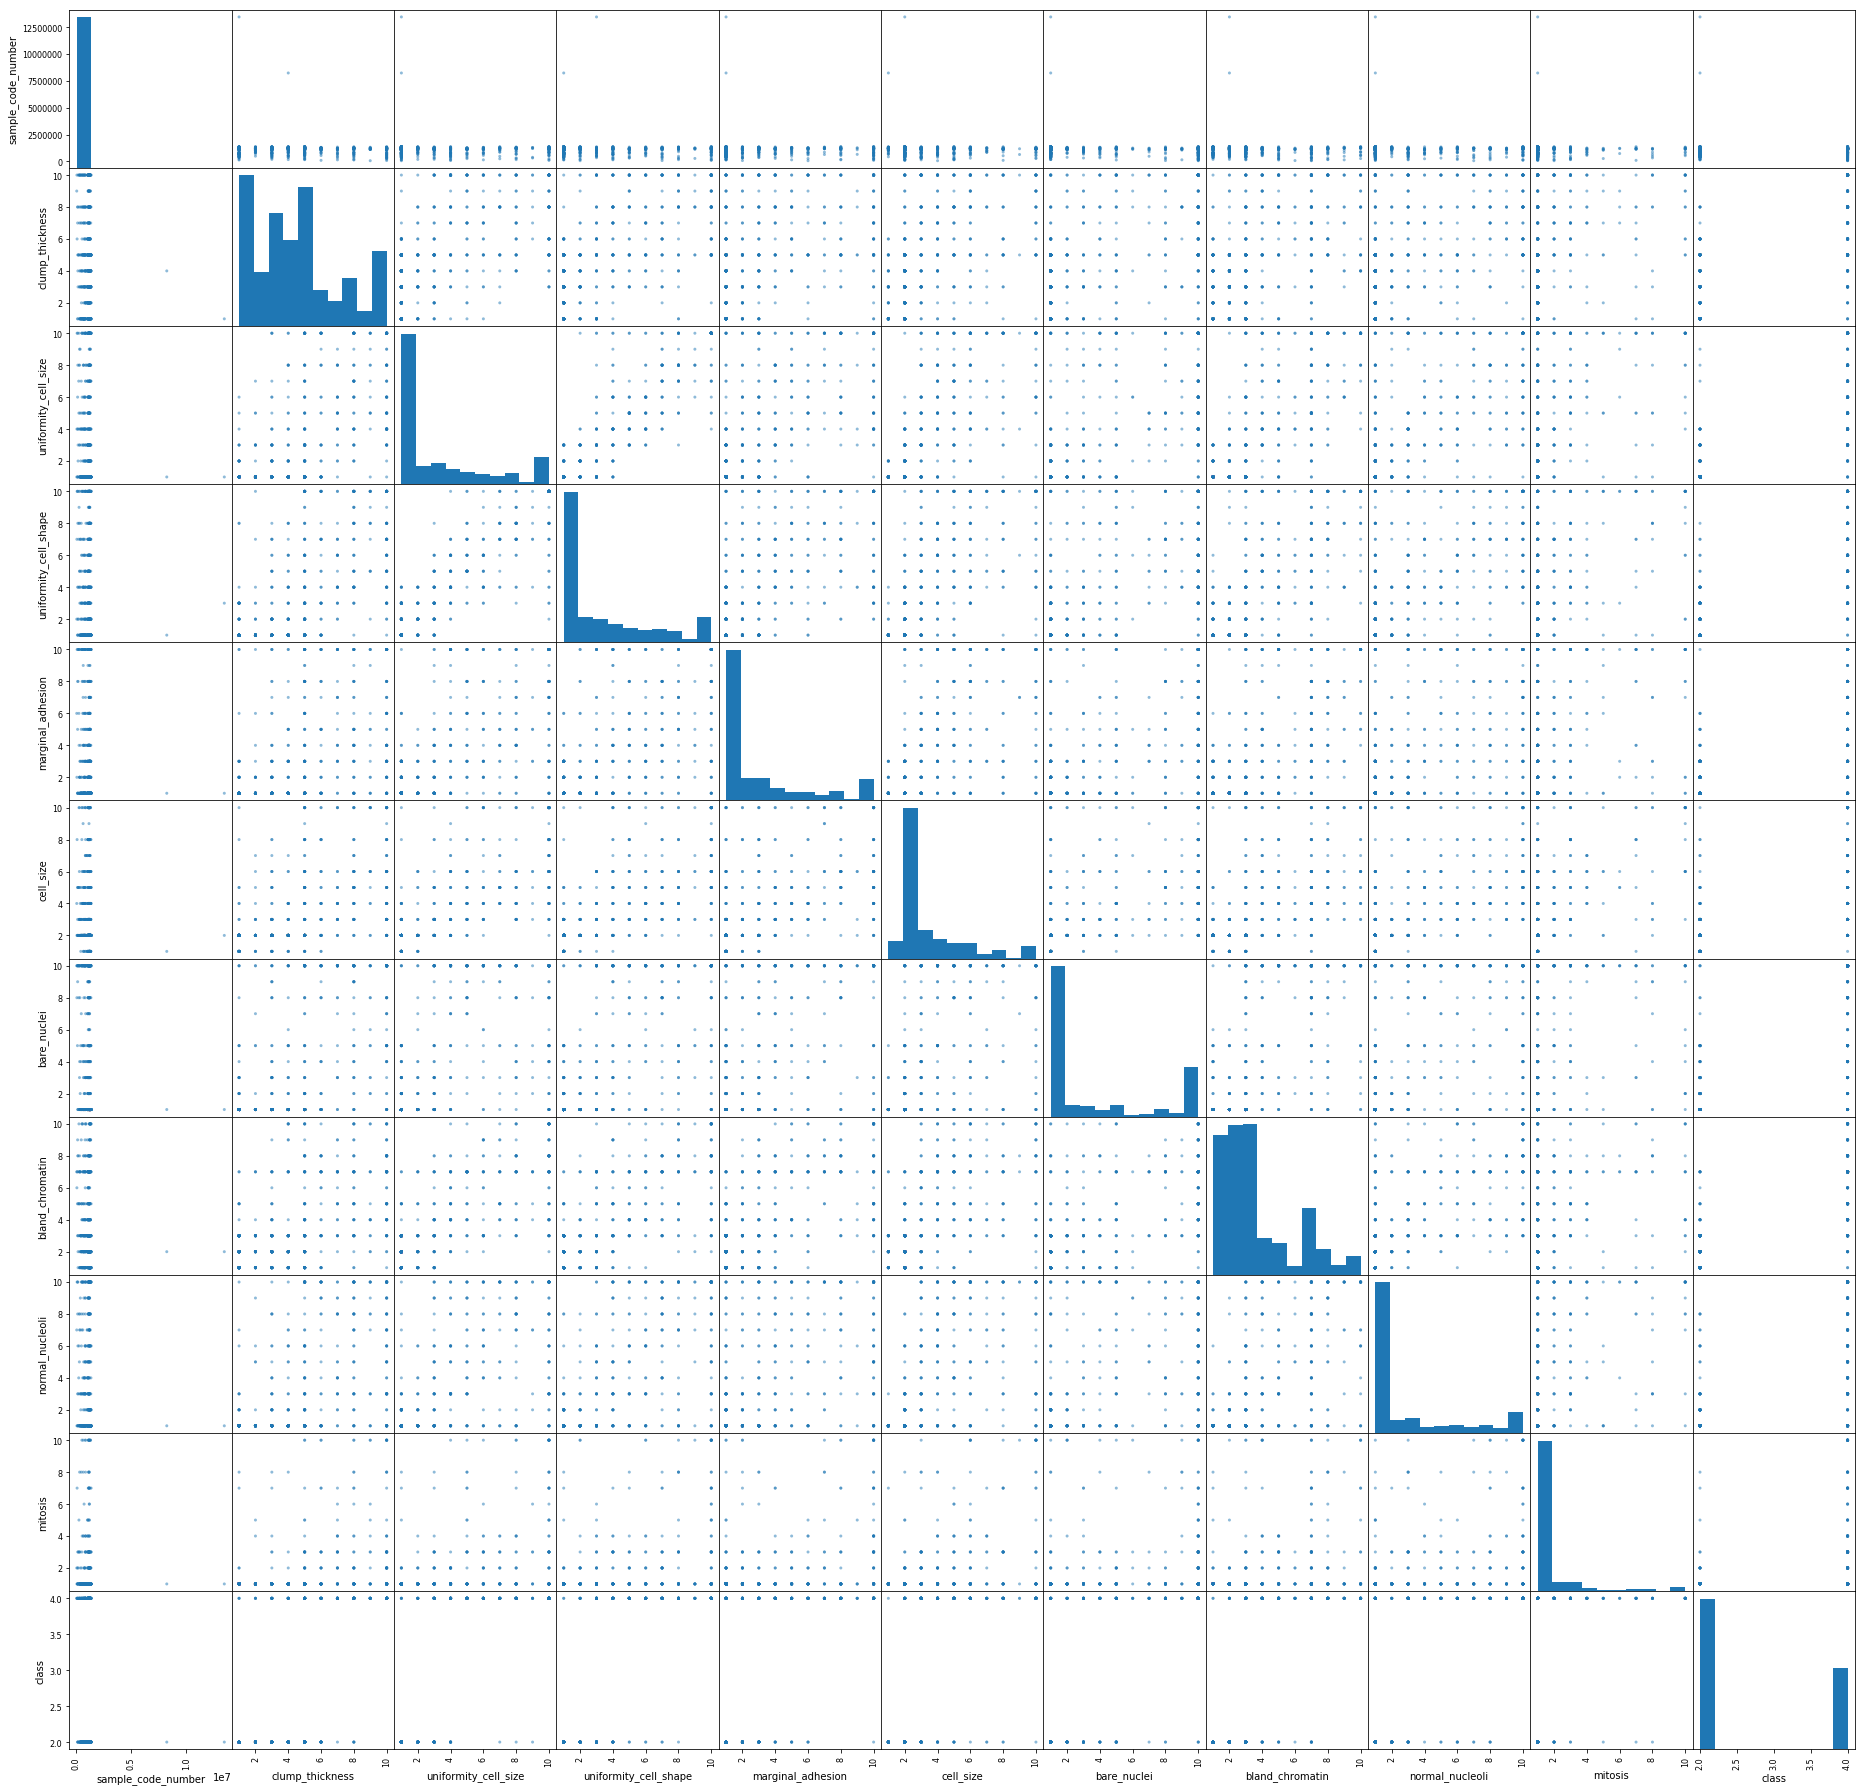

In [7]:
attributes = ['sample_code_number', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']
pd.plotting.scatter_matrix(data_df[attributes], figsize=(32,32), range_padding=0.1)

plt.savefig('scatter_matrix.jpg')

#plt.xlabels(rotation = 60)
plt.show()

In [11]:
correlation_matrix = data_df.corr()
correlation_matrix

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
sample_code_number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
clump_thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
uniformity_cell_size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
uniformity_cell_shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
cell_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitosis,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


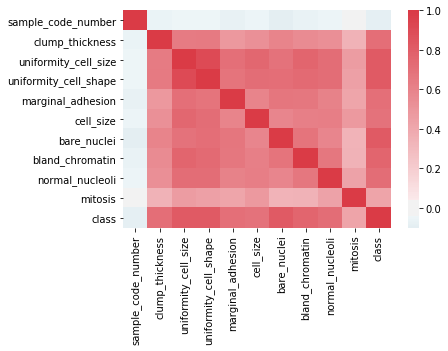

In [14]:
diverging_cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation_matrix, cmap=diverging_cmap, center=0)

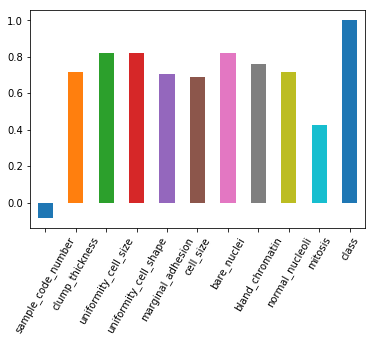

In [19]:
correlation_matrix['class'].plot(kind='bar')
plt.xticks(rotation = 60)
plt.show()



2.2.1 Features
The system that they used is called Xcyt, which was written by one of the coauthors
in his Ph.D. dissertation [Street, 1994]. A fine needle aspirate is taken directly
from a lump in a patient’s breast. The extracted fluid is then stained to emphasize the
nuclei of the cells in the fluid. Then, a digital image of the fluid is taken.
In the previous two papers that used mammograms for diagnosis, the authors
simply computed two features from the digital images. In this paper, the authors
computed 30 features from each image. These features are: “area, radius, perimeter,
symmetry, number and size of concavities, fractal dimension (of the boundary),
compactness, smoothness (local variation of radial segments), and texture (variance of
gray levels inside the boundary)” [Mangasarian]. For each of these ten features, the
authors calculated the mean value, extreme value, and standard error, totaling 30 features.
These 30 features will serve as input to the diagnosis tool.
